<a href="https://colab.research.google.com/github/Parneet-Sandhu/Egyptian-Hieroglyphs/blob/main/Egyptian_Hieroglyphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'egyptian-hieroglyphs:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3593485%2F6252936%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240609%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240609T154141Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D36fa4ab9c4b4f2a2139fc618ac0eec1d412bfeef69b6fb104323c5ac7bb7b45f6f272e76cf6be828f2e7360e469f69ea78727eae486af4220e6de4d32523f2098f02a59181fefcc1a2fe495a2f5f064c82ebebc2bf4917a6217a3fa38fd81813f9a1461d6d23a110ed4566d9439a2f111efe395f64bd7e3bc8ca0f6a47c18220d8336f10b098a6eeef8e342a358dc01d17ed159c83fcee711d51d00da0a77ac0faa2195f42ca9e0f18d59960c7844959f45f99ef628320af724852d17a46e8654471130ceb64d26a7fc282953386d048456c6b6a9472f14b28177a885e4bbc97b0fcef078af46dc5646d9616d5d0f589dcd42ee686589ed9d6159826c45e761f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 10871531 bytes downloaded
Downloaded and uncompressed: egyptian-hieroglyphs
Data source import complete.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import os

In [3]:
train = pd.read_csv("/kaggle/input/egyptian-hieroglyphs/train/_annotations.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2723 non-null   object
 1   width     2723 non-null   int64 
 2   height    2723 non-null   int64 
 3   class     2723 non-null   object
 4   xmin      2723 non-null   int64 
 5   ymin      2723 non-null   int64 
 6   xmax      2723 non-null   int64 
 7   ymax      2723 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 170.3+ KB


In [4]:
valid = pd.read_csv("/kaggle/input/egyptian-hieroglyphs/valid/_annotations.csv")
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  778 non-null    object
 1   width     778 non-null    int64 
 2   height    778 non-null    int64 
 3   class     778 non-null    object
 4   xmin      778 non-null    int64 
 5   ymin      778 non-null    int64 
 6   xmax      778 non-null    int64 
 7   ymax      778 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 48.8+ KB


In [5]:
test = pd.read_csv("/kaggle/input/egyptian-hieroglyphs/test/_annotations.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  389 non-null    object
 1   width     389 non-null    int64 
 2   height    389 non-null    int64 
 3   class     389 non-null    object
 4   xmin      389 non-null    int64 
 5   ymin      389 non-null    int64 
 6   xmax      389 non-null    int64 
 7   ymax      389 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 24.4+ KB


In [7]:
def count_classes(data, name: str):
    print(f"Unique classes in {name}: {data['class'].nunique()}")
    class_count = data['class'].value_counts().reset_index()
    class_count.columns = ['class', 'count']

    median_value = class_count['count'].median()
    plt.figure(figsize=(12,24))
    sns.barplot(data=class_count, x='count', y='class', color="navajowhite")
    plt.axvline(x=median_value, linestyle='--')
    plt.show()

Unique classes in train: 95


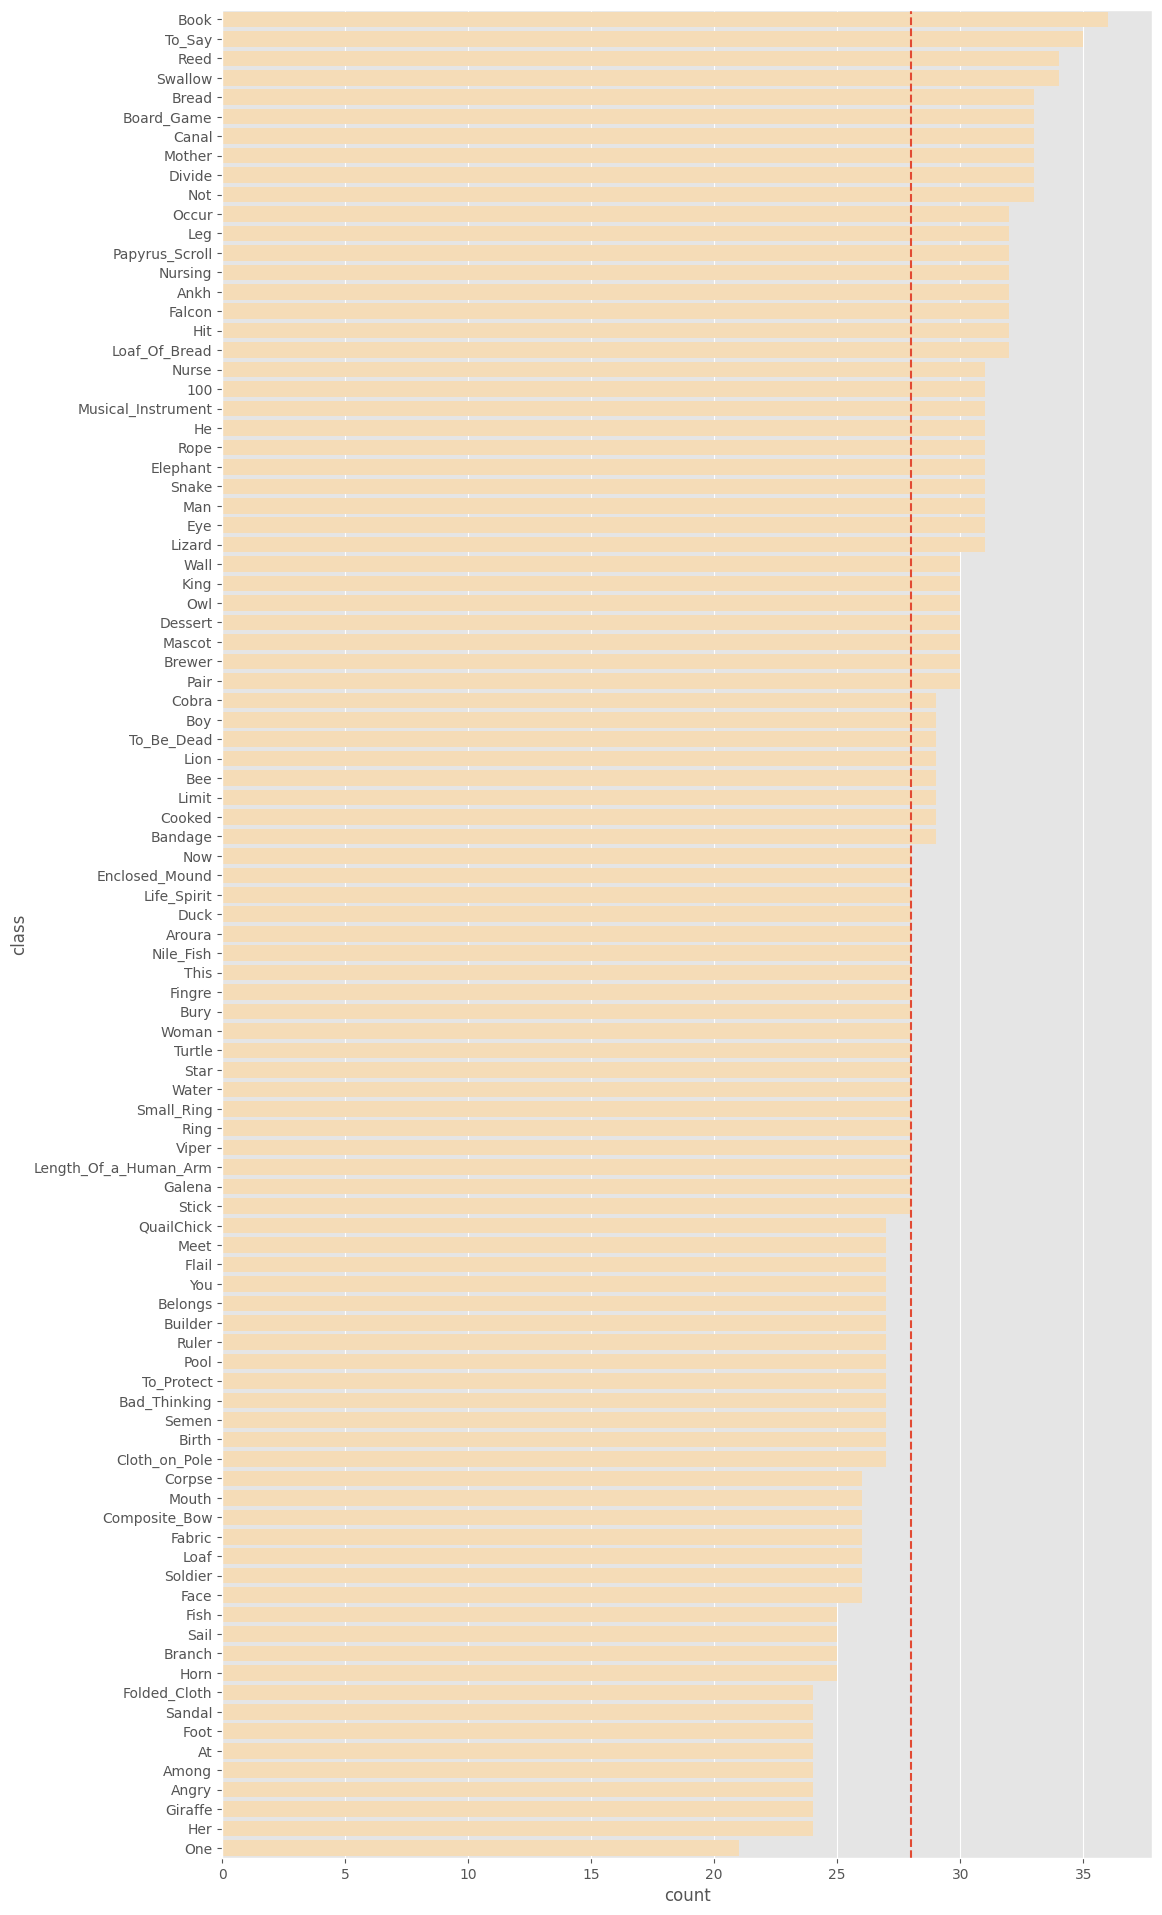

In [8]:
count_classes(train, "train")

Unique classes in validation: 95


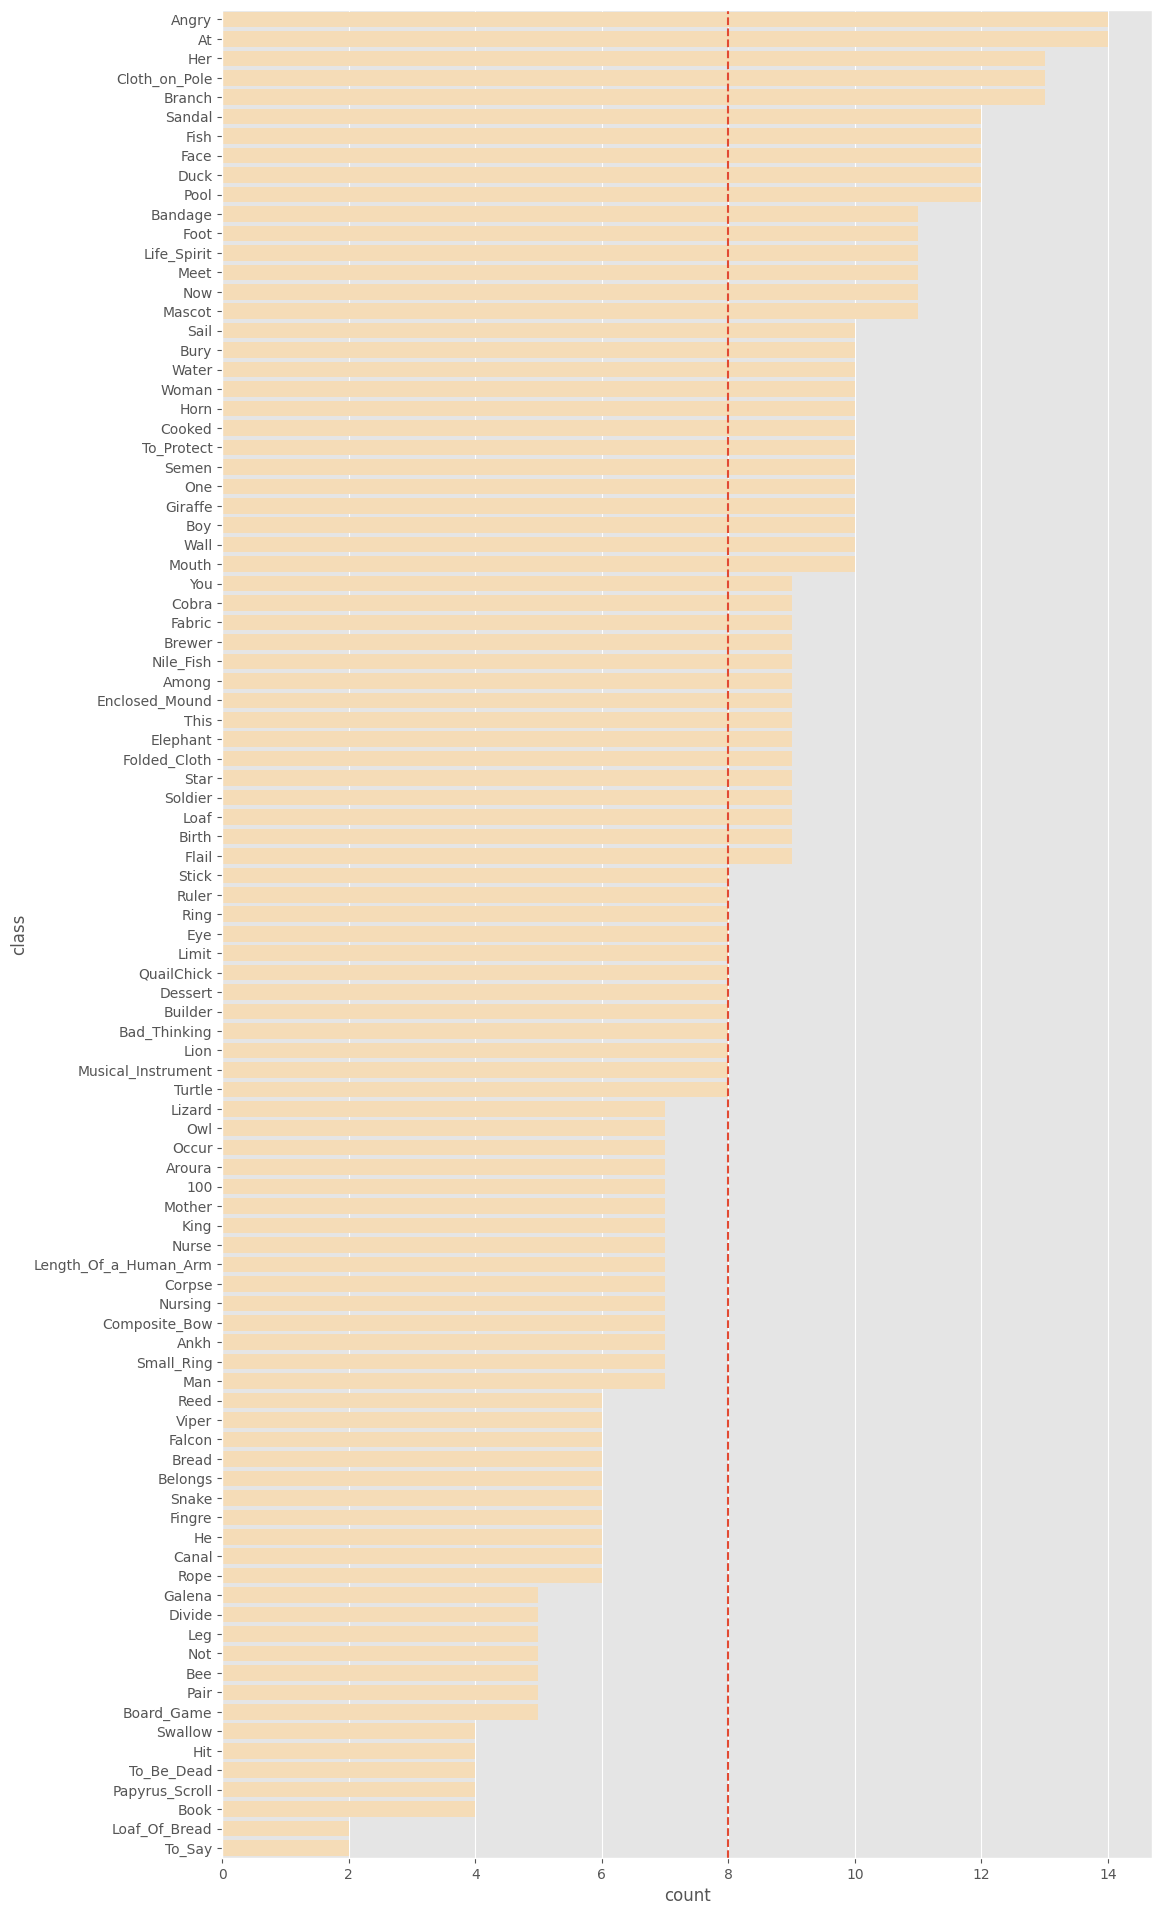

In [9]:
count_classes(valid, "validation")

Unique classes in test: 94


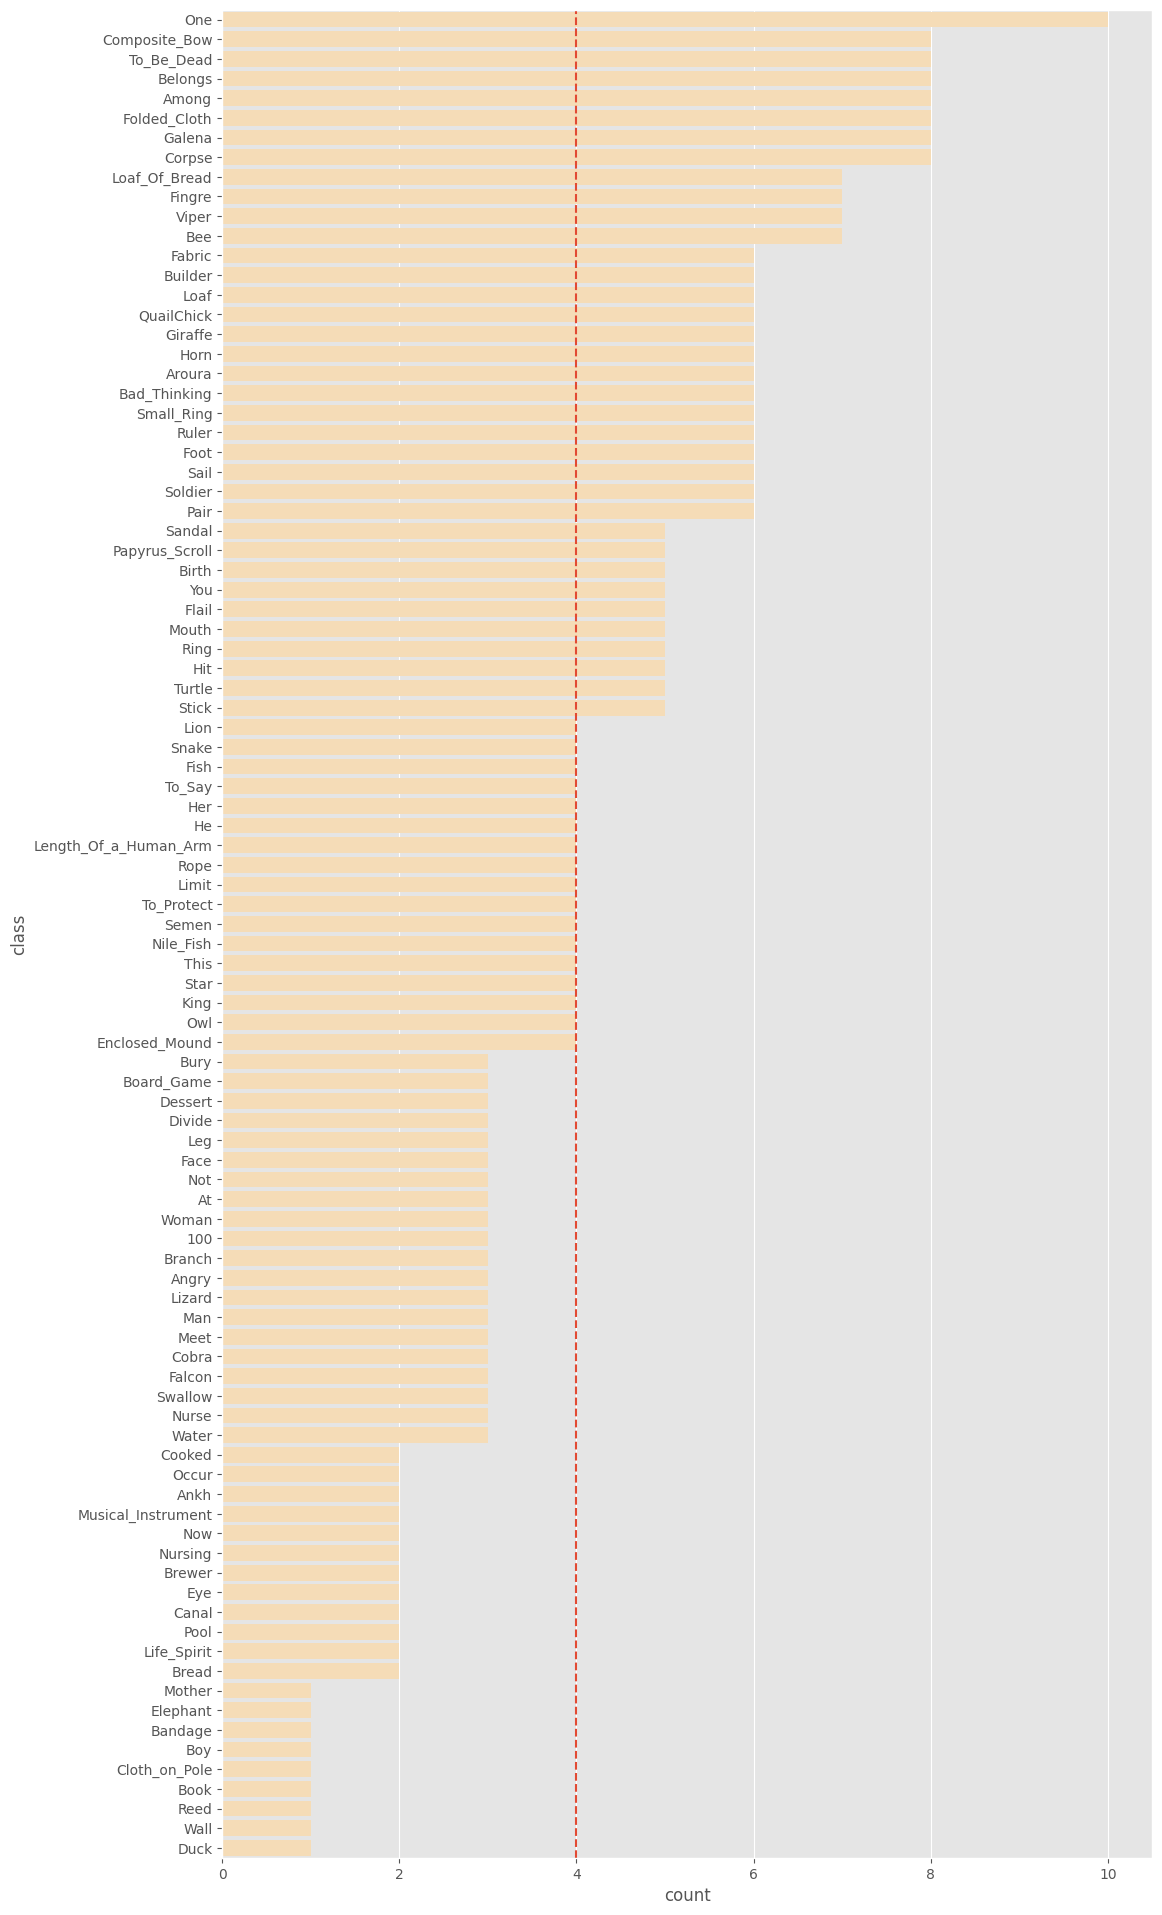

In [10]:
count_classes(test, "test")

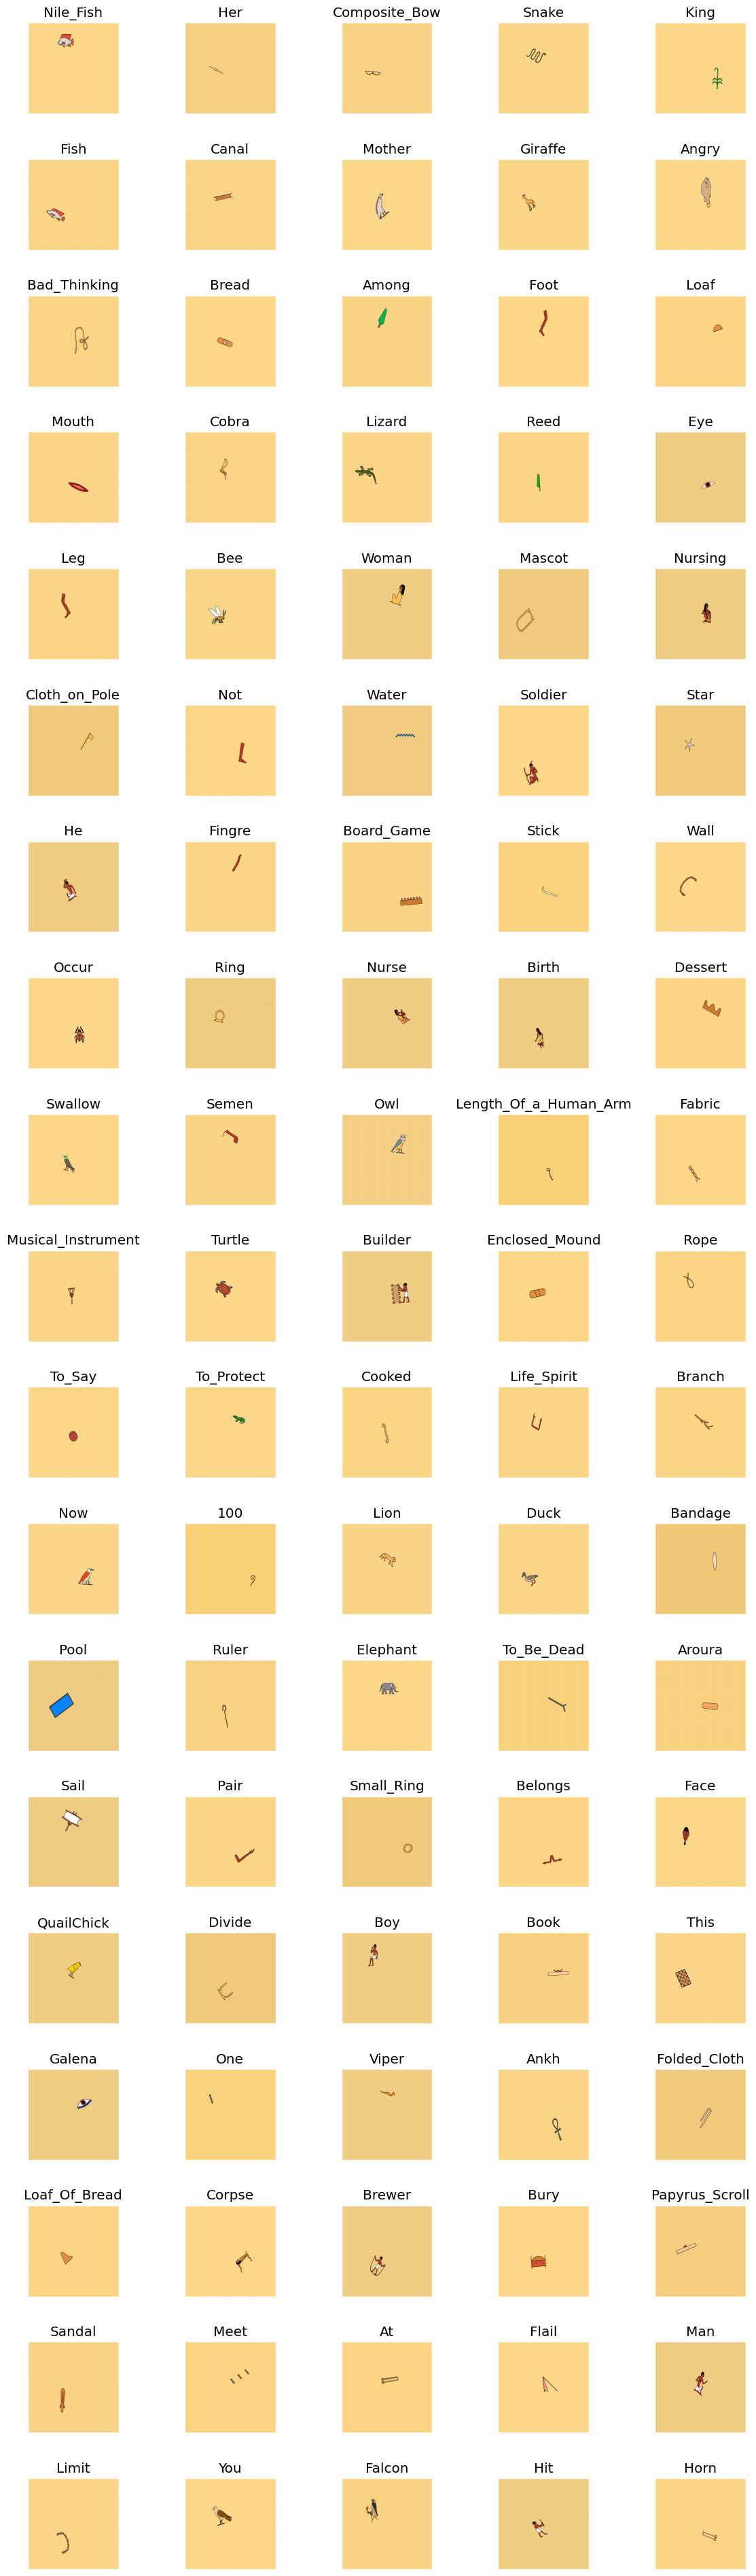

In [11]:
unique_classes = train['class'].unique()

base_path = '/kaggle/input/egyptian-hieroglyphs/train/'

i,j=0,0

fig, ax = plt.subplots(19,5, figsize=(12,38))


for cl in unique_classes:
    sample = train[train['class'] == cl].sample(1)

    path = base_path + sample['filename'].values[0]
    image = plt.imread(path)

    ax[j,i].imshow(image)
    ax[j,i].grid(False)
    ax[j,i].get_xaxis().set_visible(False)
    ax[j,i].get_yaxis().set_visible(False)
    ax[j,i].set_title(cl)

    i += 1
    if i == 5:
        i = 0
        j += 1

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

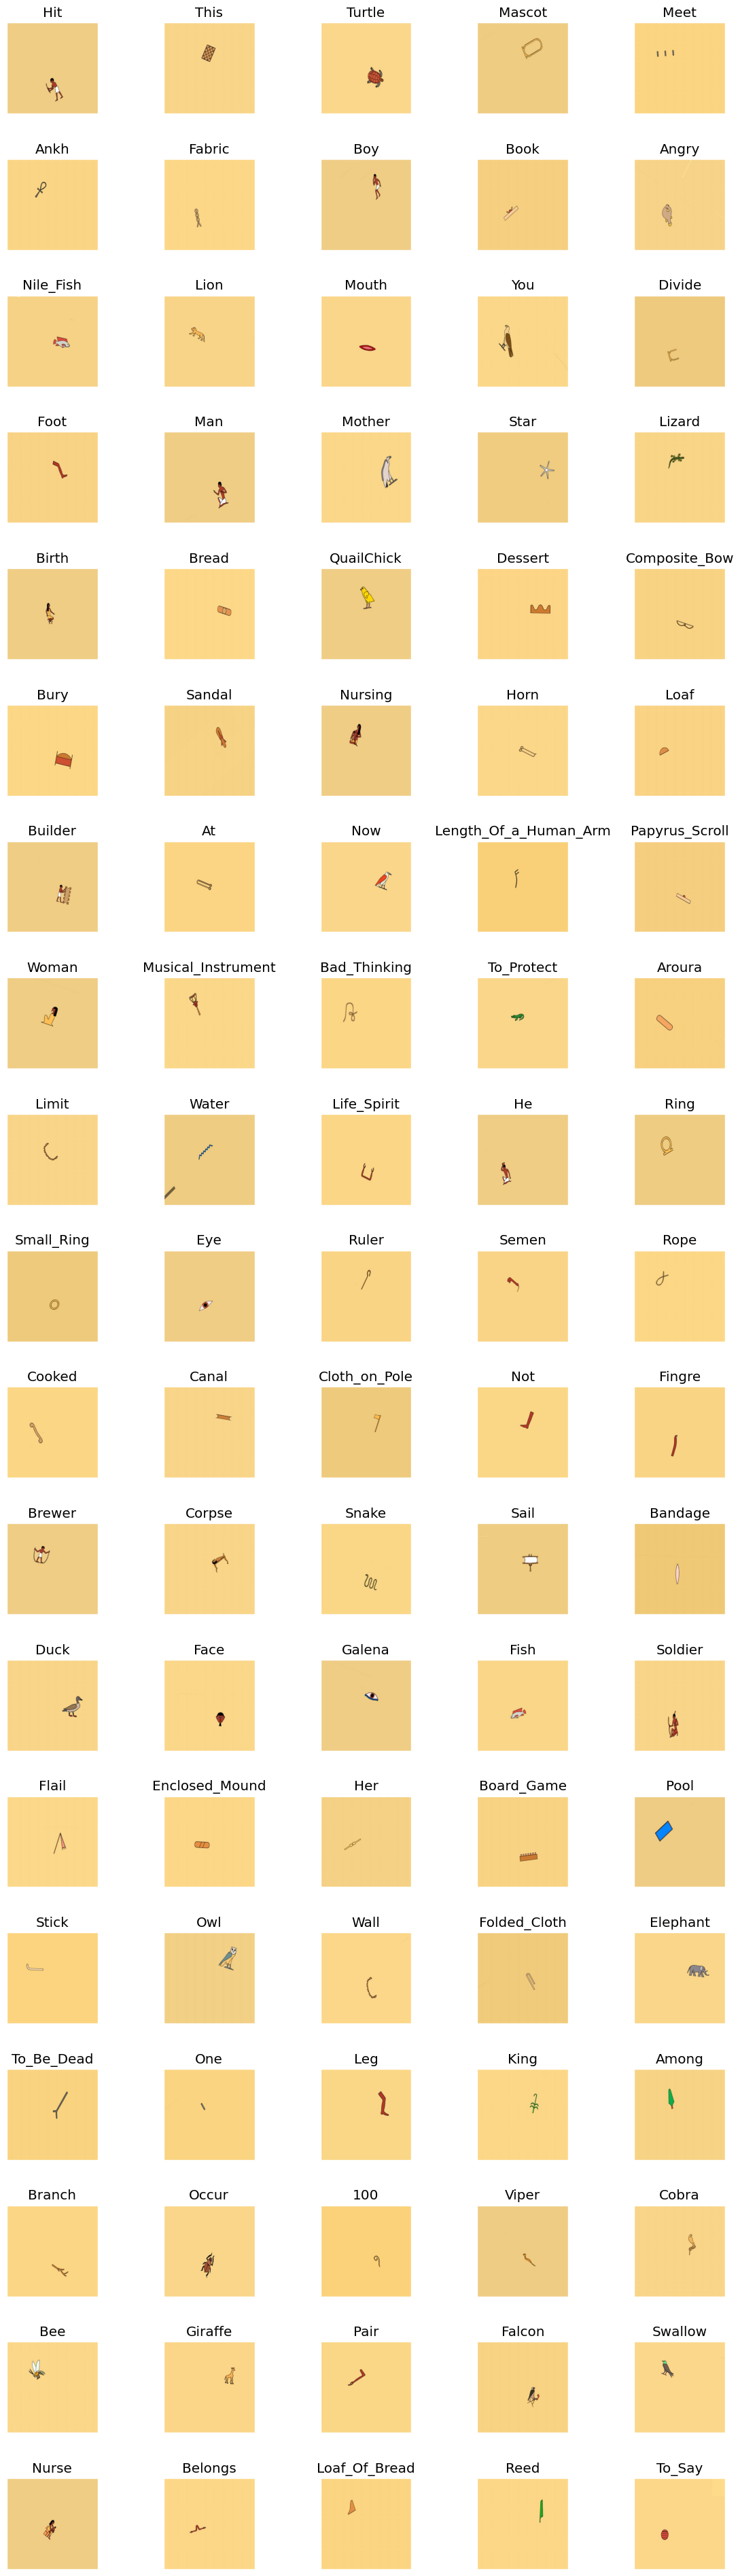

In [12]:
unique_classes = valid['class'].unique()

base_path = '/kaggle/input/egyptian-hieroglyphs/valid/'

i,j=0,0

fig, ax = plt.subplots(19,5, figsize=(12,38))


for cl in unique_classes:
    sample = valid[valid['class'] == cl].sample(1)

    path = base_path + sample['filename'].values[0]
    image = plt.imread(path)

    ax[j,i].imshow(image)
    ax[j,i].grid(False)
    ax[j,i].get_xaxis().set_visible(False)
    ax[j,i].get_yaxis().set_visible(False)
    ax[j,i].set_title(cl)

    i += 1
    if i == 5:
        i = 0
        j += 1

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

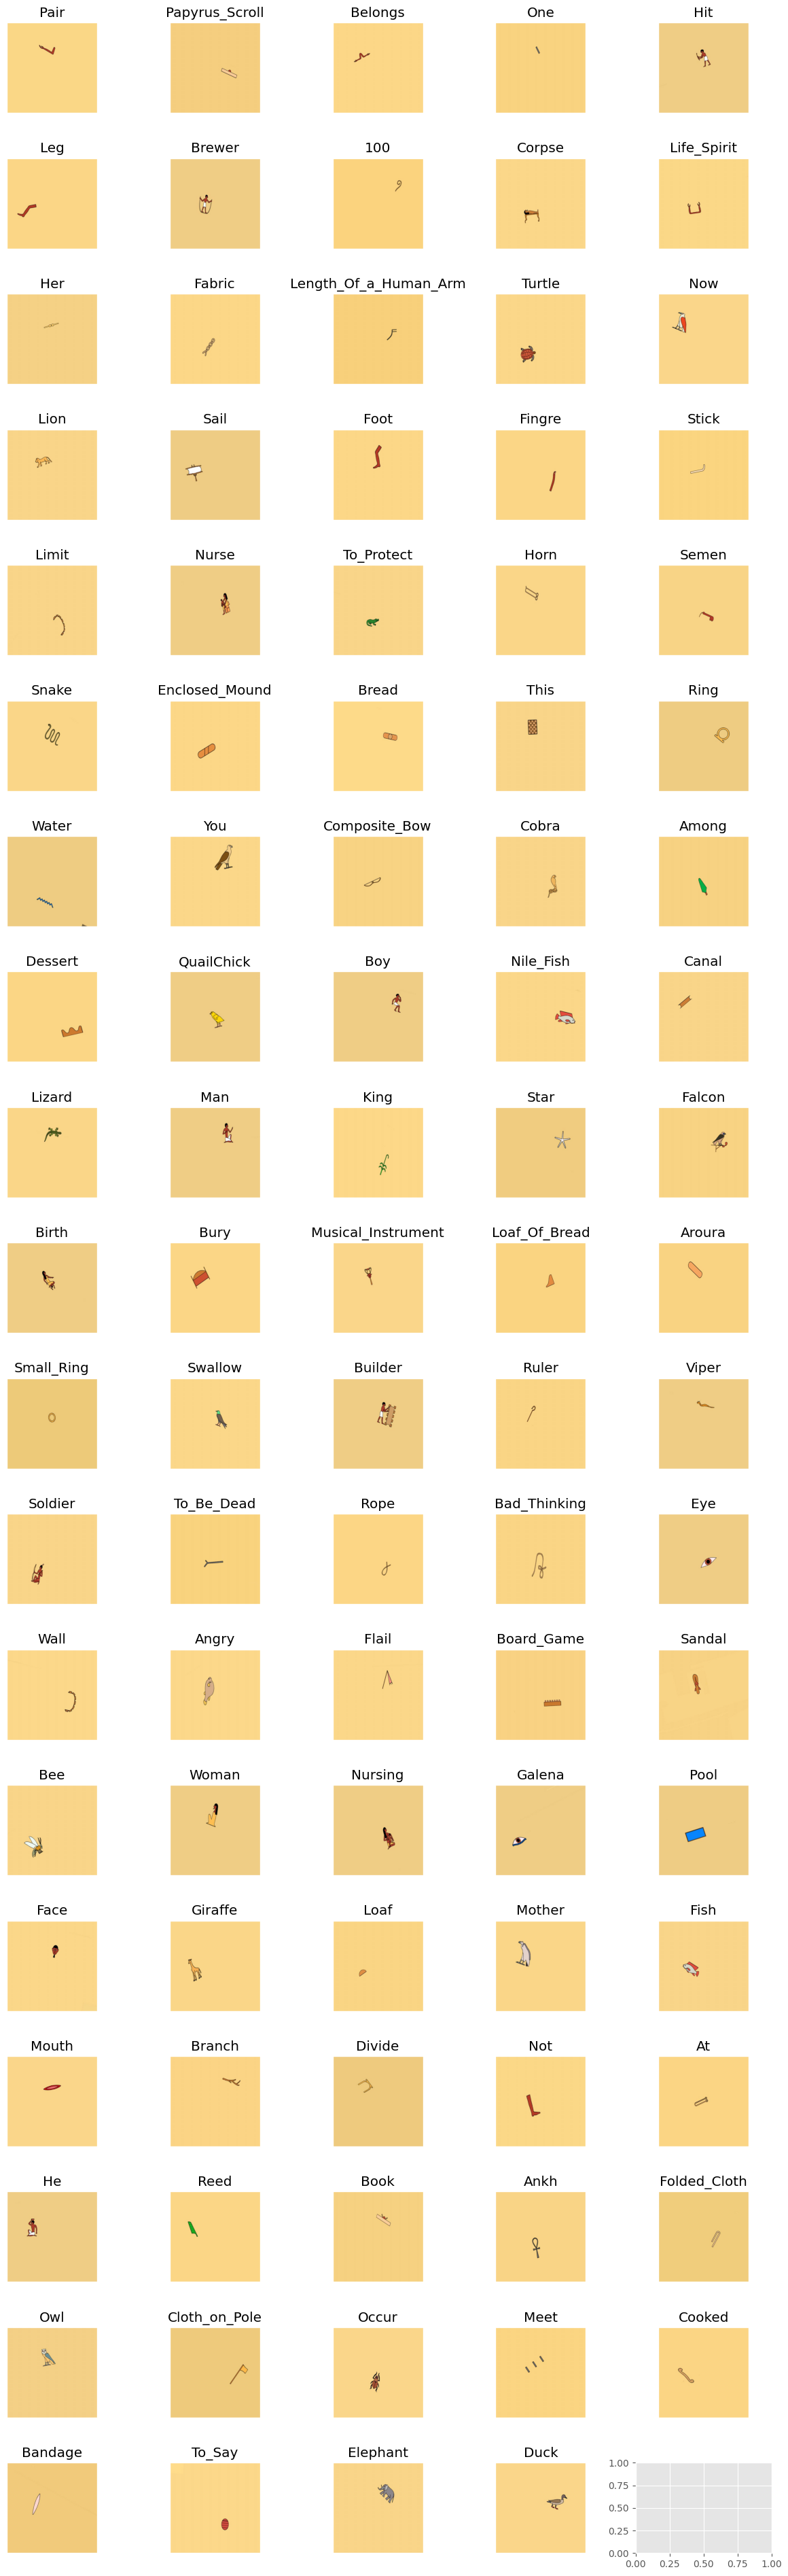

In [13]:
unique_classes = test['class'].unique()

base_path = '/kaggle/input/egyptian-hieroglyphs/test/'

i,j=0,0

fig, ax = plt.subplots(19,5, figsize=(12,38))


for cl in unique_classes:
    sample = test[test['class'] == cl].sample(1)

    path = base_path + sample['filename'].values[0]
    image = plt.imread(path)

    ax[j,i].imshow(image)
    ax[j,i].grid(False)
    ax[j,i].get_xaxis().set_visible(False)
    ax[j,i].get_yaxis().set_visible(False)
    ax[j,i].set_title(cl)

    i += 1
    if i == 5:
        i = 0
        j += 1

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()